In [1]:
import os
import pandas as pd

directory_path = r'C:\Users\jos34\OneDrive\바탕 화면\호서대학교 4학년\AI프레임워크 보안\CIC-IDS\MachineLearningCSV\MachineLearningCVE'

file_list = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

dfs = []
for file in file_list:
    file_path = os.path.join(directory_path, file)
    df = pd.read_csv(file_path)
    dfs.append(df)

main_df = pd.concat(dfs, ignore_index=True)

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
main_df.drop(columns=['H'], inplace=True)
main_df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
main_df.dropna(subset=['Flow Bytes/s'], inplace=True)

In [4]:
missing_values = main_df.isnull().sum()
missing_values = missing_values[missing_values > 0]

if len(missing_values) > 0:
    print("결측값이 있는 열:")
    for col, val in missing_values.items():
        print(f"{col}: {val}")
else:
    print("결측값이 있는 열이 없습니다.")

결측값이 있는 열이 없습니다.


In [5]:
main_df['Flow Bytes/s'] = main_df['Flow Bytes/s'].astype(float)
main_df[' Flow Packets/s'] = main_df[' Flow Packets/s'].astype(float)

In [6]:
label_counts = main_df[' Label'].value_counts()

print("Label의 분포별 정확한 수치:")
print(label_counts)


Label의 분포별 정확한 수치:
 Label
BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [7]:
main_df = main_df[main_df[' Label'] != 'BENIGN']

In [8]:
label_counts = main_df[' Label'].value_counts()

print("Label의 분포별 정확한 수치:")
print(label_counts)


Label의 분포별 정확한 수치:
 Label
DoS Hulk                      230124
PortScan                      158804
DDoS                          128025
DoS GoldenEye                  10293
FTP-Patator                     7935
SSH-Patator                     5897
DoS slowloris                   5796
DoS Slowhttptest                5499
Bot                             1956
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Infiltration                      36
Web Attack � Sql Injection        21
Heartbleed                        11
Name: count, dtype: int64


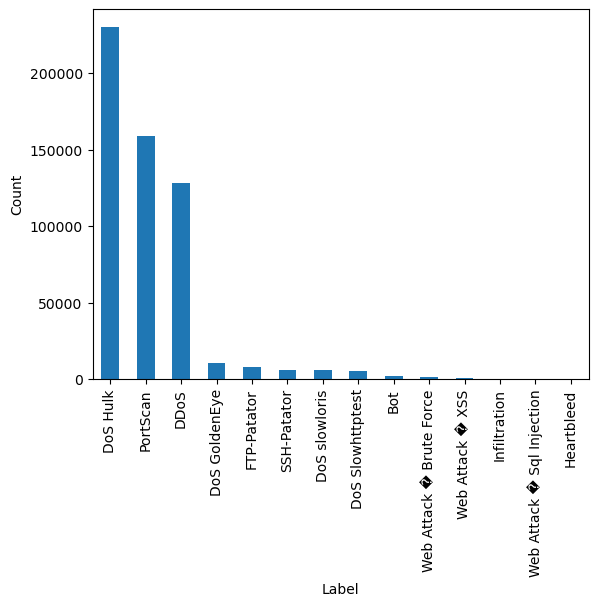

In [9]:
import matplotlib.pyplot as plt

main_df[' Label'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [10]:
x_data = main_df.drop([' Label'], axis=1)
y_data = main_df[' Label']

In [11]:
x_data.head(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
18883,80.0,1293792.0,3.0,7.0,26.0,11607.0,20.0,0.0,8.666667,10.263203,5840.0,0.0,1658.142857,2137.297080,8991.398927,7.729218,1.437547e+05,4.308658e+05,1292730.0,2.0,747.0,373.5,5.239661e+02,744.0,3.0,1293746.0,215624.3333,527671.9348,1292730.0,2.0,0.0,0.0,0.0,0.0,72.0,152.0,2.318765,5.410452,0.0,5840.0,1057.545455,1853.437529,3.435231e+06,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1163.300000,8.666667,1658.142857,72.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,26.0,7.0,11607.0,8192.0,229.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18884,80.0,4421382.0,4.0,0.0,24.0,0.0,6.0,6.0,6.000000,0.000000,0.0,0.0,0.000000,0.000000,5.428167,0.904695,1.473794e+06,2.552043e+06,4420639.0,340.0,4421382.0,1473794.0,2.552043e+06,4420639.0,340.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,0.904695,0.000000,6.0,6.0,6.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.500000,6.000000,0.000000,80.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,24.0,0.0,0.0,256.0,-1.0,3.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18885,80.0,1083538.0,3.0,6.0,26.0,11601.0,20.0,0.0,8.666667,10.263203,4380.0,0.0,1933.500000,1757.789948,10730.588130,8.306123,1.354422e+05,3.777253e+05,1070206.0,41.0,12982.0,6491.0,8.165669e+03,12265.0,717.0,1083407.0,216681.4000,477167.0977,1070206.0,41.0,0.0,0.0,0.0,0.0,72.0,132.0,2.768708,5.537415,0.0,4380.0,1162.700000,1645.241762,2.706820e+06,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1291.888889,8.666667,1933.500000,72.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,26.0,6.0,11601.0,8192.0,229.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18886,80.0,80034360.0,8.0,4.0,56.0,11601.0,20.0,0.0,7.000000,5.656854,8760.0,0.0,2900.250000,4128.319301,145.649943,0.149936,7.275851e+06,2.110000e+07,70600000.0,6.0,78700000.0,11200000.0,2.630000e+07,70600000.0,247.0,1354806.0,451602.0000,777575.2592,1349464.0,190.0,0.0,0.0,0.0,0.0,172.0,92.0,0.099957,0.049979,0.0,8760.0,897.153846,2488.507044,6.192667e+06,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,971.916667,7.000000,2900.250000,172.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,56.0,4.0,11601.0,256.0,229.0,6.0,20.0,939.0,0.0,939.0,939.0,39300000.0,44200000.0,70600000.0,8072664.0
18887,80.0,642654.0,3.0,6.0,26.0,11607.0,20.0,0.0,8.666667,10.263203,5840.0,0.0,1934.500000,2538.919278,18101.497850,14.004425,8.033175e+04,2.268247e+05,641694.0,3.0,801.0,400.5,5.409367e+02,783.0,18.0,642493.0,128498.6000,286885.1169,641694.0,3.0,0.0,0.0,0.0,0.0,72.0,132.0,4.668142,9.336284,0.0,5840.0,1163.300000,2138.329153,4.572452e+06,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1292.555556,8.666667,1934.500000,72.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,26.0,6.0,11607.0,8192.0,229.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18888,80.0,79731718.0,8.0,5.0,56.0,11601.0,20.0,0.0,7.000000,5.656854,5840.0,0.0,2320.200000,2436.833027,146

In [12]:
y_data.head(10)

18883    DDoS
18884    DDoS
18885    DDoS
18886    DDoS
18887    DDoS
18888    DDoS
18889    DDoS
18890    DDoS
18891    DDoS
18892    DDoS
Name:  Label, dtype: object

In [13]:
from sklearn.model_selection import train_test_split

x_train_50, x_test_50, y_train_50, y_test_50 = train_test_split(x_data, y_data, test_size=0.5, random_state=42)
x_train_60, x_test_60, y_train_60, y_test_60 = train_test_split(x_data, y_data, test_size=0.4, random_state=42)
x_train_70, x_test_70, y_train_70, y_test_70 = train_test_split(x_data, y_data, test_size=0.3, random_state=42)
x_train_80, x_test_80, y_train_80, y_test_80 = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
x_train_90, x_test_90, y_train_90, y_test_90 = train_test_split(x_data, y_data, test_size=0.1, random_state=42)

In [14]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

class_mapping = {
    'DoS Hulk': 0,
    'PortScan': 1,
    'DDoS': 2,
    'DoS GoldenEye': 3,
    'FTP-Patator': 4,
    'SSH-Patator': 5,
    'DoS slowloris': 6,
    'DoS Slowhttptest': 7,
    'Bot': 8,
    'Web Attack � Brute Force': 9,
    'Web Attack � XSS': 10,
    'Infiltration': 11,
    'Web Attack � Sql Injection': 12,
    'Heartbleed': 13
}

datasets = {
    "50%": (x_train_50, x_test_50, y_train_50, y_test_50),
    "60%": (x_train_60, x_test_60, y_train_60, y_test_60),
    "70%": (x_train_70, x_test_70, y_train_70, y_test_70),
    "80%": (x_train_80, x_test_80, y_train_80, y_test_80),
    "90%": (x_train_90, x_test_90, y_train_90, y_test_90)
}

params = {
    'booster': 'gbtree',
    'learning_rate': 0.05,
    'max_depth': 12,
    'num_leaves': 63,
    'bagging_freq': 32,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'objective': 'multi:softmax',
    'num_class': 14,  
    'eval_metric': 'merror'
}

for name, (x_train, x_test, y_train, y_test) in datasets.items():
    print(f"Data Split: {name}")
    
    y_train_mapped = [class_mapping[label] for label in y_train]
    y_test_mapped = [class_mapping[label] for label in y_test]

    model = xgb.XGBClassifier(**params)
    model.fit(x_train, y_train_mapped)

    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test_mapped, y_pred)
    print(f'XGBoost 정확도 : {accuracy}')
    
    report = classification_report(y_test_mapped, y_pred)
    print(report)


Data Split: 50%


C:\Users\jos34\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:14:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "bagging_fraction", "bagging_freq", "feature_fraction", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost 정확도 : 0.9983936926382969
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    115160
           1       1.00      1.00      1.00     79351
           2       1.00      1.00      1.00     63975
           3       1.00      1.00      1.00      5175
           4       1.00      1.00      1.00      3983
           5       1.00      1.00      1.00      2929
           6       0.99      1.00      0.99      2931
           7       0.99      0.99      0.99      2723
           8       1.00      1.00      1.00       941
           9       0.74      0.86      0.80       763
          10       0.46      0.28      0.35       320
          11       1.00      0.80      0.89        15
          12       0.00      0.00      0.00         7
          13       1.00      1.00      1.00         5

    accuracy                           1.00    278278
   macro avg       0.87      0.85      0.86    278278
weighted avg       1.00      1.00      1.00    

C:\Users\jos34\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:14:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "bagging_fraction", "bagging_freq", "feature_fraction", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost 정확도 : 0.9983649488148125
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     92076
           1       1.00      1.00      1.00     63561
           2       1.00      1.00      1.00     51124
           3       1.00      1.00      1.00      4144
           4       1.00      1.00      1.00      3195
           5       1.00      1.00      1.00      2376
           6       0.99      1.00      0.99      2335
           7       0.99      0.99      0.99      2150
           8       1.00      1.00      1.00       770
           9       0.73      0.87      0.79       603
          10       0.46      0.26      0.34       265
          11       1.00      0.77      0.87        13
          12       0.67      0.33      0.44         6
          13       1.00      1.00      1.00         5

    accuracy                           1.00    222623
   macro avg       0.92      0.87      0.89    222623
weighted avg       1.00      1.00      1.00    

C:\Users\jos34\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:15:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "bagging_fraction", "bagging_freq", "feature_fraction", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost 정확도 : 0.9985026981379554
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     69038
           1       1.00      1.00      1.00     47722
           2       1.00      1.00      1.00     38330
           3       1.00      1.00      1.00      3063
           4       1.00      1.00      1.00      2378
           5       1.00      1.00      1.00      1771
           6       0.99      1.00      0.99      1780
           7       1.00      0.99      1.00      1646
           8       1.00      1.00      1.00       575
           9       0.74      0.89      0.81       452
          10       0.54      0.29      0.38       195
          11       1.00      0.75      0.86         8
          12       0.50      0.50      0.50         4
          13       1.00      1.00      1.00         5

    accuracy                           1.00    166967
   macro avg       0.91      0.89      0.90    166967
weighted avg       1.00      1.00      1.00    

C:\Users\jos34\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:15:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "bagging_fraction", "bagging_freq", "feature_fraction", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost 정확도 : 0.9982301997987638
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45896
           1       1.00      1.00      1.00     31951
           2       1.00      1.00      1.00     25583
           3       0.99      1.00      1.00      2045
           4       1.00      1.00      1.00      1539
           5       1.00      1.00      1.00      1163
           6       0.99      0.99      0.99      1196
           7       1.00      0.99      0.99      1138
           8       1.00      1.00      1.00       370
           9       0.70      0.83      0.76       277
          10       0.46      0.29      0.36       143
          11       1.00      0.60      0.75         5
          12       0.00      0.00      0.00         3
          13       1.00      1.00      1.00         3

    accuracy                           1.00    111312
   macro avg       0.87      0.84      0.85    111312
weighted avg       1.00      1.00      1.00    

C:\Users\jos34\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:16:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "bagging_fraction", "bagging_freq", "feature_fraction", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost 정확도 : 0.9982212160413971
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22926
           1       1.00      1.00      1.00     15922
           2       1.00      1.00      1.00     12845
           3       1.00      1.00      1.00       979
           4       1.00      1.00      1.00       778
           5       1.00      1.00      1.00       586
           6       0.99      0.99      0.99       620
           7       0.99      0.99      0.99       591
           8       1.00      0.99      1.00       179
           9       0.72      0.87      0.79       151
          10       0.53      0.32      0.40        73
          11       1.00      0.33      0.50         3
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         2

    accuracy                           1.00     55656
   macro avg       0.87      0.82      0.83     55656
weighted avg       1.00      1.00      1.00    

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

for name, (x_train, x_test, y_train, y_test) in datasets.items():
    print(f"Data Split: {name}")
    
    y_train_mapped = [class_mapping[label] for label in y_train]
    y_test_mapped = [class_mapping[label] for label in y_test]
    
    LOG_model = LogisticRegression()

    LOG_model.fit(x_train, y_train_mapped)

    LOG_y_pred = LOG_model.predict(x_test)

    LOG_accuracy = accuracy_score(y_test_mapped, LOG_y_pred)
    print("정확도:", LOG_accuracy)

    LOG_report = classification_report(y_test_mapped, LOG_y_pred)
    print("분류 보고서:")
    print(LOG_report)


Data Split: 50%


C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정확도: 0.9149267998188861


C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


분류 보고서:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22926
           1       1.00      1.00      1.00     15922
           2       1.00      1.00      1.00     12845
           3       1.00      1.00      1.00       979
           4       1.00      1.00      1.00       778
           5       1.00      1.00      1.00       586
           6       0.99      0.99      0.99       620
           7       0.99      0.99      0.99       591
           8       1.00      0.99      1.00       179
           9       0.72      0.87      0.79       151
          10       0.53      0.32      0.40        73
          11       1.00      0.33      0.50         3
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         2

    accuracy                           1.00     55656
   macro avg       0.87      0.82      0.83     55656
weighted avg       1.00      1.00      1.00     55656

Data Split: 60%


C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정확도: 0.9193299883659819


C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


분류 보고서:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22926
           1       1.00      1.00      1.00     15922
           2       1.00      1.00      1.00     12845
           3       1.00      1.00      1.00       979
           4       1.00      1.00      1.00       778
           5       1.00      1.00      1.00       586
           6       0.99      0.99      0.99       620
           7       0.99      0.99      0.99       591
           8       1.00      0.99      1.00       179
           9       0.72      0.87      0.79       151
          10       0.53      0.32      0.40        73
          11       1.00      0.33      0.50         3
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         2

    accuracy                           1.00     55656
   macro avg       0.87      0.82      0.83     55656
weighted avg       1.00      1.00      1.00     55656

Data Split: 70%


C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정확도: 0.9157917432786119


C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


분류 보고서:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22926
           1       1.00      1.00      1.00     15922
           2       1.00      1.00      1.00     12845
           3       1.00      1.00      1.00       979
           4       1.00      1.00      1.00       778
           5       1.00      1.00      1.00       586
           6       0.99      0.99      0.99       620
           7       0.99      0.99      0.99       591
           8       1.00      0.99      1.00       179
           9       0.72      0.87      0.79       151
          10       0.53      0.32      0.40        73
          11       1.00      0.33      0.50         3
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         2

    accuracy                           1.00     55656
   macro avg       0.87      0.82      0.83     55656
weighted avg       1.00      1.00      1.00     55656

Data Split: 80%


C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


정확도: 0.9205476498490729
분류 보고서:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22926
           1       1.00      1.00      1.00     15922
           2       1.00      1.00      1.00     12845
           3       1.00      1.00      1.00       979
           4       1.00      1.00      1.00       778
           5       1.00      1.00      1.00       586
           6       0.99      0.99      0.99       620
           7       0.99      0.99      0.99       591
           8       1.00      0.99      1.00       179
           9       0.72      0.87      0.79       151
          10       0.53      0.32      0.40        73
          11       1.00      0.33      0.50         3
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         2

    accuracy                           1.00     55656
   macro avg       0.87      0.82      0.83     55656
weighted avg       1.00      1.00      1.00     

C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


정확도: 0.919218053758804
분류 보고서:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22926
           1       1.00      1.00      1.00     15922
           2       1.00      1.00      1.00     12845
           3       1.00      1.00      1.00       979
           4       1.00      1.00      1.00       778
           5       1.00      1.00      1.00       586
           6       0.99      0.99      0.99       620
           7       0.99      0.99      0.99       591
           8       1.00      0.99      1.00       179
           9       0.72      0.87      0.79       151
          10       0.53      0.32      0.40        73
          11       1.00      0.33      0.50         3
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         2

    accuracy                           1.00     55656
   macro avg       0.87      0.82      0.83     55656
weighted avg       1.00      1.00      1.00     5

C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [18]:
from sklearn.neighbors import KNeighborsClassifier

for name, (x_train, x_test, y_train, y_test) in datasets.items():
    print(f"Data Split: {name}")

    
    y_train_mapped = [class_mapping[label] for label in y_train]
    y_test_mapped = [class_mapping[label] for label in y_test]

    Knn_model = KNeighborsClassifier(n_neighbors=5)  

    Knn_model.fit(x_train, y_train_mapped)

    Knn_y_pred = Knn_model.predict(x_test)

    Knn_accuracy = accuracy_score(y_test_mapped, Knn_y_pred)
    print("정확도:", Knn_accuracy)

    
    Knn_report = classification_report(y_test_mapped, Knn_y_pred)
    print("분류 보고서:")
    print(Knn_report)


Data Split: 50%


AttributeError: 'Flags' object has no attribute 'c_contiguous'